In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor #** Most Accurate
from sklearn.preprocessing import StandardScaler
from sklearn import me

In [2]:
# Loading the data
car_dataset = pd.read_csv('car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# car_dataset.shape
car_dataset.info()
# car_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical data columns

In [6]:
# encoding 'Fuel_Type' column
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)

# encoding 'Seller_Type' column
car_dataset.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)

# encoding 'Transmission' column
car_dataset.replace({'Transmission':{'Manual':0, 'Automatic':1,}}, inplace=True)

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
# Splitting data
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']
scaler = StandardScaler()
scaler.fit(X)
standardized = scaler.transform(X)
X = standardized

In [9]:
# Splitting data into train and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

# Model Training
### 1. Linear Regression

In [10]:

#loading the model
lin_reg_model = LinearRegression()

In [11]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

In [12]:
# Model Evaluation
# Prediction on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [13]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.8799451660493707


# Visualize the actual prices and predicted prices

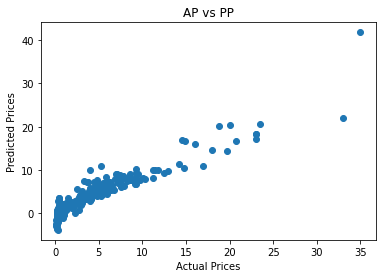

In [14]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('AP vs PP')
plt.show()

In [15]:
# Prediction on test data
test_data_prediction = lin_reg_model.predict(X_test)

In [16]:
# R squared error
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print(error_score2)

0.8365766715025003


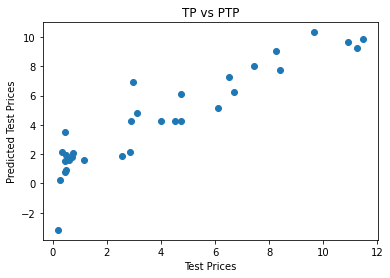

In [17]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Test Prices')
plt.ylabel('Predicted Test Prices')
plt.title('TP vs PTP')
plt.show()

### 2. Lasso Regression

In [18]:
#loading the model
lass_reg_model = RandomForestRegressor()

In [19]:
lass_reg_model.fit(X_train, Y_train)

RandomForestRegressor()

In [20]:
# Model Evaluation
# Prediction on training data
training_data_prediction = lass_reg_model.predict(X_train)

In [21]:
# R squared error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print(error_score)

0.9806233660203858


# Visualize the actual prices and predicted prices

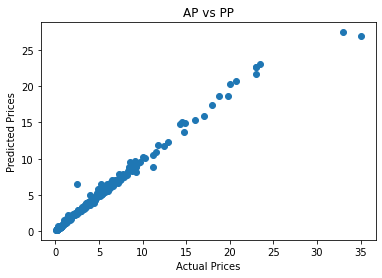

In [22]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('AP vs PP')
plt.show()

In [23]:
# Prediction on test data
test_data_prediction = lass_reg_model.predict(X_test)

In [24]:
# R squared error
error_score2 = metrics.r2_score(Y_test, test_data_prediction)
print(error_score2)

0.9843191128546449


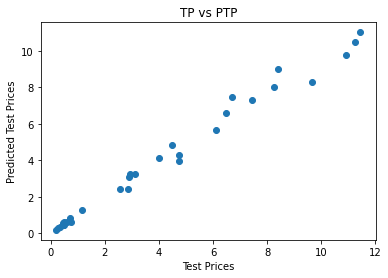

In [25]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Test Prices')
plt.ylabel('Predicted Test Prices')
plt.title('TP vs PTP')
plt.show()

In [26]:
#Predictive System
features = (2014,6.87,42450,1,0,0,0)
features_numpy = np.asarray(features)
features_numpy_reshaped = features_numpy.reshape(1,-1)
std_data = scaler.transform(features_numpy_reshaped)
prediction = lass_reg_model.predict(std_data)
print(f"Predicted price of car is :{prediction[0]} lakh Rs")

Predicted price of car is :4.284000000000001 lakh Rs


C:\Users\siddhesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
#Saving the model
from joblib import dump, load
dump(lass_reg_model, 'CarPrice.joblib')

['CarPrice.joblib']

In [28]:
#Using the model
from joblib import load
model = load('CarPrice.joblib')
features = (2013,9.4,36198,0,0,1,0)
features_numpy = np.asarray(features)
features_numpy_reshaped = features_numpy.reshape(1,-1)
std_data = scaler.transform(features_numpy_reshaped)
prediction = model.predict(std_data)
print(f"Predicted price of car is :{prediction[0]} lakh Rs")

Predicted price of car is :5.136400000000006 lakh Rs


C:\Users\siddhesh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
